<a href="https://colab.research.google.com/github/Ramdao/SoftwarePackagesHW-1-2-3-/blob/main/Problem_set2_Software_Packages_Tashrif_Radin_Aliipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.	Use sentiment analysis on social media posts to gauge public opinion on various topics or brands. Show graphs about it

In [ ]:
df = pd.read_csv("Tweets.csv",on_bad_lines='skip')

In [ ]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,5.696710e+17,negative,1.0000,Damaged Luggage,1.0000,Southwest,NaN,CarolynPerilli,NaN,0,@SouthwestAir everyone deserves red carpet tx ...,NaN,2/22/2015 17:33,NaN,NaN
4874,5.696710e+17,negative,1.0000,Flight Attendant Complaints,1.0000,Southwest,NaN,heyashleyglad,NaN,0,@SouthwestAir staff was overall awful through ...,NaN,2/22/2015 17:32,NaN,Central Time (US & Canada)
4875,5.696710e+17,positive,1.0000,NaN,NaN,Southwest,NaN,_AmandaBrittney,NaN,0,@SouthwestAir lol I already am ! I am a card m...,NaN,2/22/2015 17:31,Virginia.,Central Time (US & Canada)
4876,5.696710e+17,positive,0.6626,NaN,NaN,Southwest,NaN,TNVOLINFL,NaN,0,@SouthwestAir. 50th Anniversary on April 10t...,NaN,2/22/2015 17:31,NaN,NaN


['negative' 'neutral' 'positive']


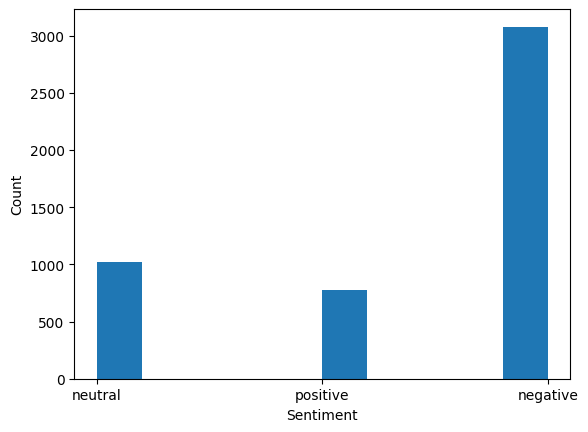

In [ ]:
unique_sentiment = np.sort(df["airline_sentiment"].unique())
print(unique_sentiment)

_ = plt.figure()
plt.hist(df["airline_sentiment"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

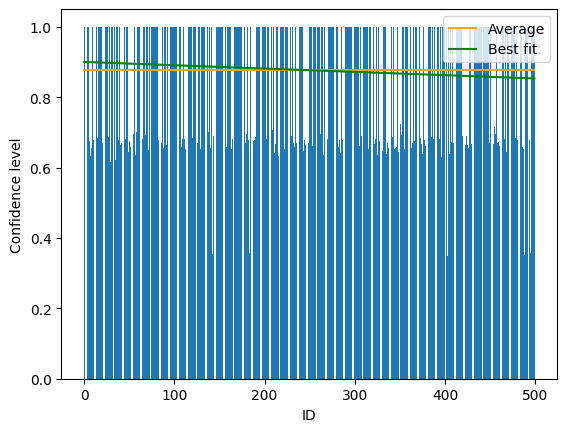

0.8764808000000001


In [ ]:
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
avgx=[]
labels = np.arange(0,len(df["airline_sentiment_confidence"][:500]))

for i in range(500):
  avgx.append(df["airline_sentiment_confidence"][:500].mean())

x_fit = np.array(labels).astype(int).reshape(-1, 1)
y_fit = np.array(df["airline_sentiment_confidence"][:500])
model = LinearRegression()
model.fit(x_fit, y_fit)
y_pred = model.predict(x_fit)


fig = plt.figure()
plt.bar(labels,df["airline_sentiment_confidence"][:500])
plt.plot(labels,avgx, label="Average", c="orange")
plt.plot(x_fit,y_pred, label="Best fit", c="green")
plt.xlabel('ID')
plt.ylabel("Confidence level")
plt.legend()
plt.show()
print (df["airline_sentiment_confidence"][:500].mean())

['Bad Flight' "Can't Tell" 'Cancelled Flight' 'Customer Service Issue'
 'Damaged Luggage' 'Flight Attendant Complaints' 'Flight Booking Problems'
 'Late Flight' 'Lost Luggage' 'longlines']


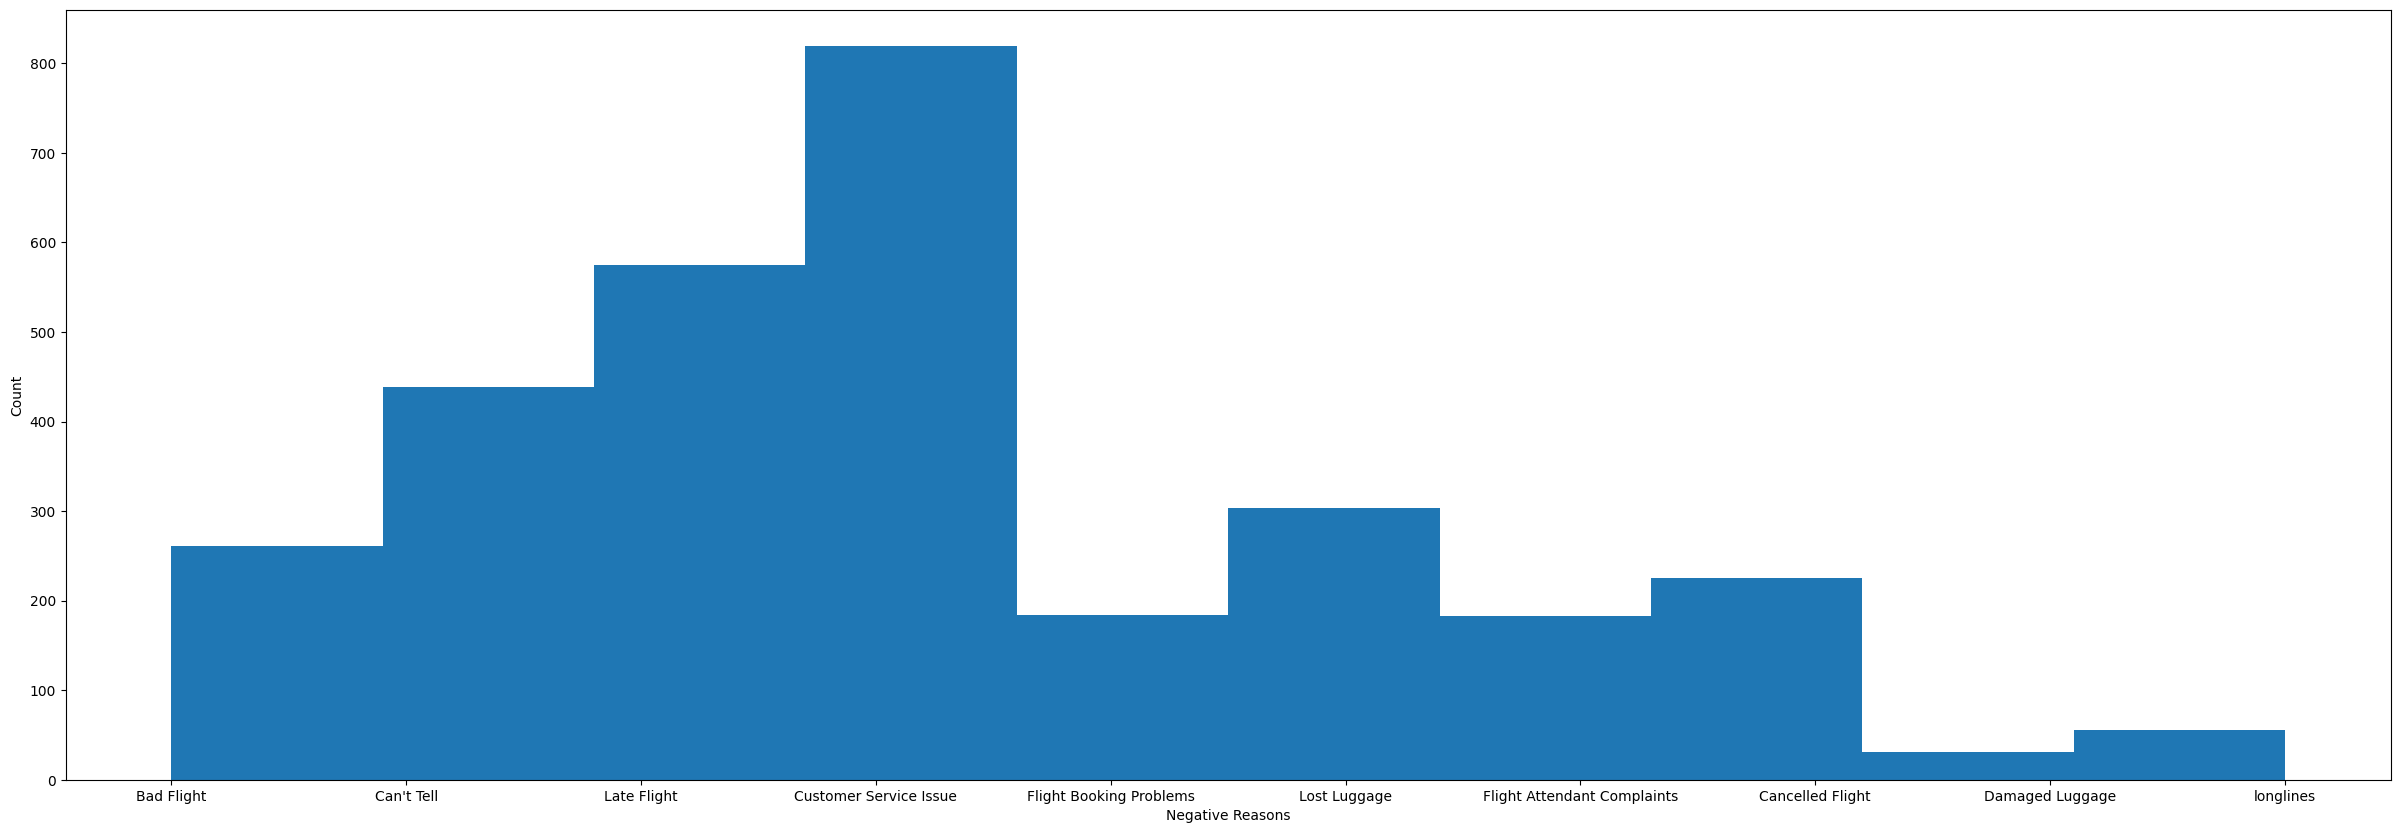

In [ ]:
df2 =df["negativereason"]
df2=df2.dropna(axis=0)
unique_Reasons = np.sort(df2.unique())
print(unique_Reasons)

_ = plt.figure(figsize=(30, 10))
plt.hist(df2)
plt.xlabel("Negative Reasons")
plt.ylabel("Count")
plt.show()



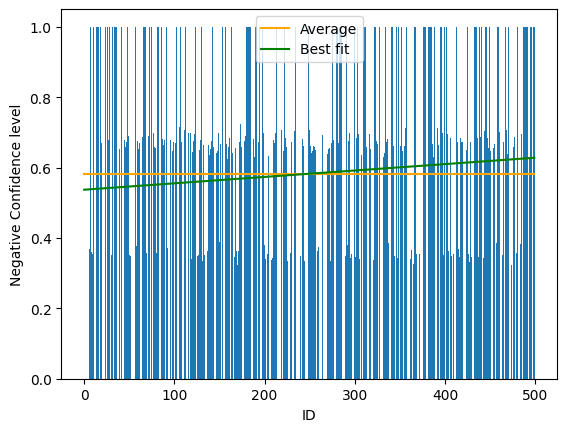

0.5823328


In [ ]:
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
df3=df["negativereason_confidence"]
df3=df3.dropna(axis=0) #cleaning the table

avgx=[]
labels = np.arange(0,len(df3[:500]))

for i in range(500):
  avgx.append(df3[:500].mean())

x_fit = np.array(labels).astype(int).reshape(-1, 1)
y_fit = np.array(df3[:500])
model = LinearRegression()
model.fit(x_fit, y_fit)
y_pred = model.predict(x_fit)


fig = plt.figure()
plt.bar(labels,df3[:500])
plt.plot(labels,avgx, label="Average", c="orange")
plt.plot(x_fit,y_pred, label="Best fit", c="green")
plt.xlabel('ID')
plt.ylabel("Negative Confidence level")
plt.legend()
plt.show()
print (df3[:500].mean())

In [ ]:
df["Month"] = pd.to_datetime(df["tweet_created"])


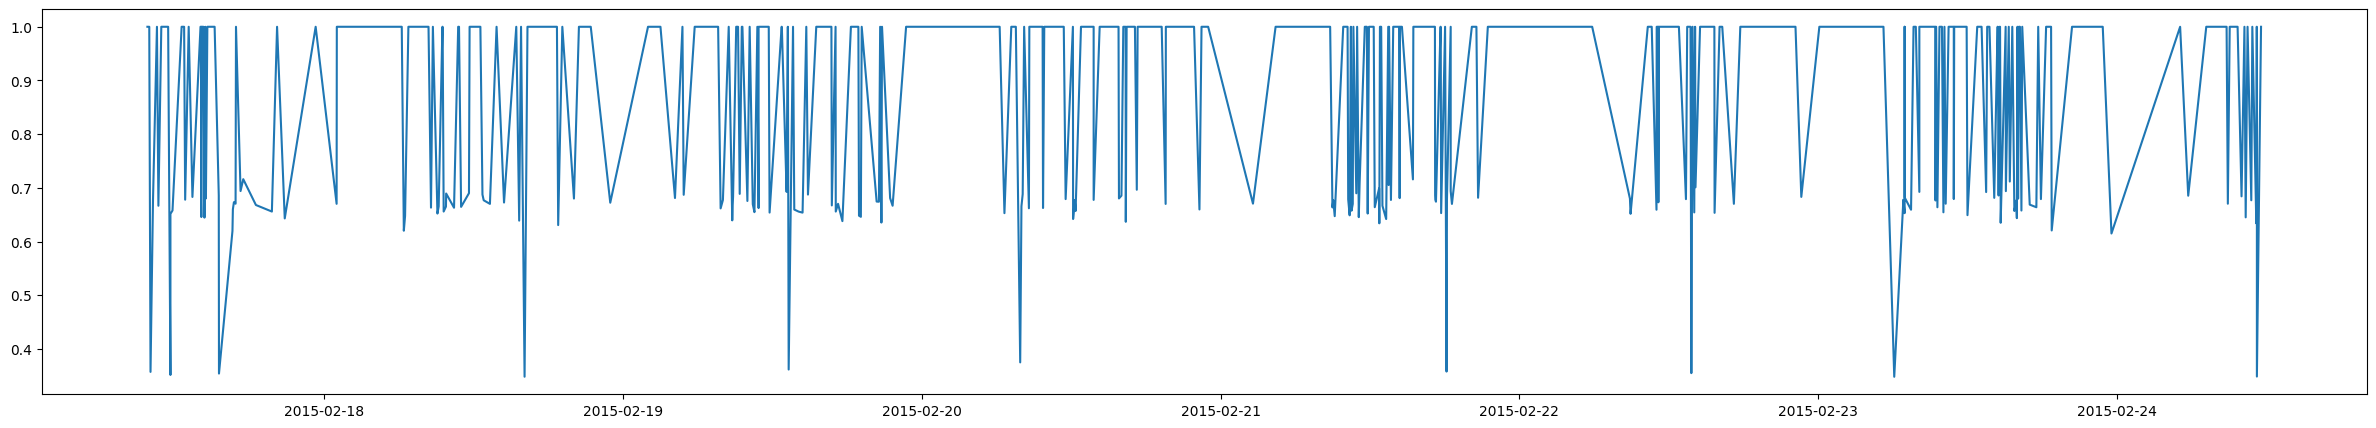

In [ ]:
_ = plt.figure(figsize=(30, 5))

plt.plot(df["Month"][:500], df["airline_sentiment_confidence"][:500])
plt.show()

# 2.	Analyse crime data to identify patterns, hot spots, and effective prevention strategies.

In [ ]:
df = pd.read_csv("Incidents_Offenses_Victims_and_Known_Offenders_by_Offense_Category_2022.csv",on_bad_lines='skip')
df=df.dropna(axis=1)
df

,Offense Category,Incidents1,Offenses,Victims2,Known\nOffenders3
0,Assault Offenses,2737786,3187575,3187575,2918676
1,Homicide Offenses,17189,18785,18786,19274
2,Human Trafficking Offenses,2234,2691,2691,2428
3,Kidnapping/Abduction,39098,43083,43083,43012
4,Sex Offenses,192147,204055,204055,186462
5,Arson,30166,30166,36637,21249
6,Bribery,652,652,695,656
7,Burglary/Breaking & Entering,672139,672139,781093,407560
8,Counterfeiting/Forgery,147573,147573,161913,109595
9,Destruction/Damage/Vandalism,1497908,1497908,1627386,859080


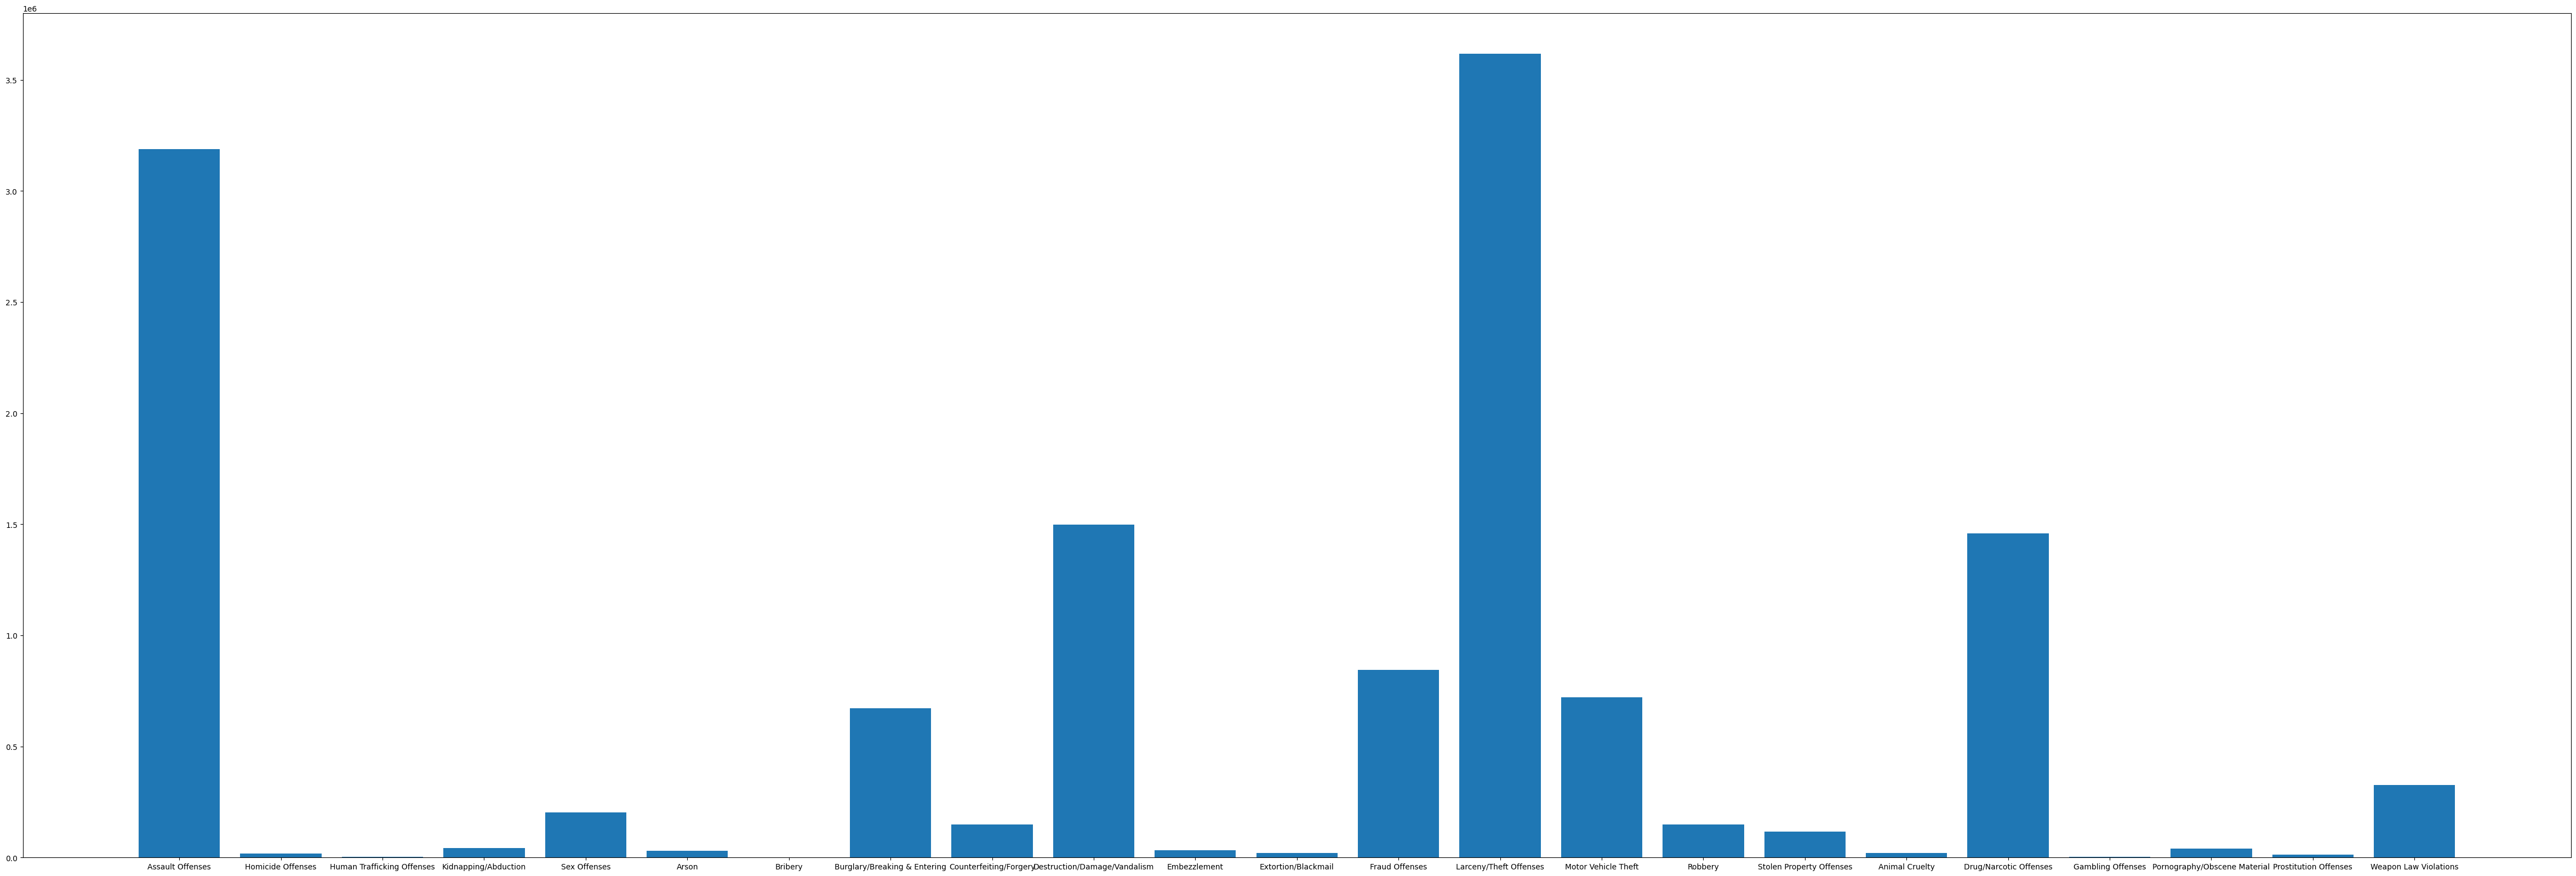

In [ ]:
fig = plt.figure(figsize=(60, 20))

plt.bar(df["Offense Category"],df["Offenses"])
plt.show()

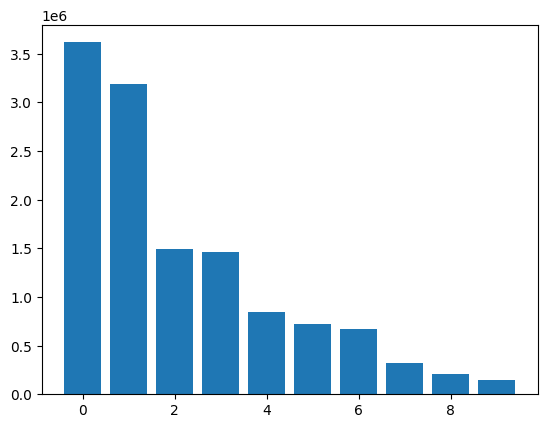

In [ ]:
sorted =np.sort(df["Offenses"])
sorted[::-1].sort()

range = np.arange(0,10)
fig = plt.figure()

plt.bar(range,sorted[:10])
plt.show()

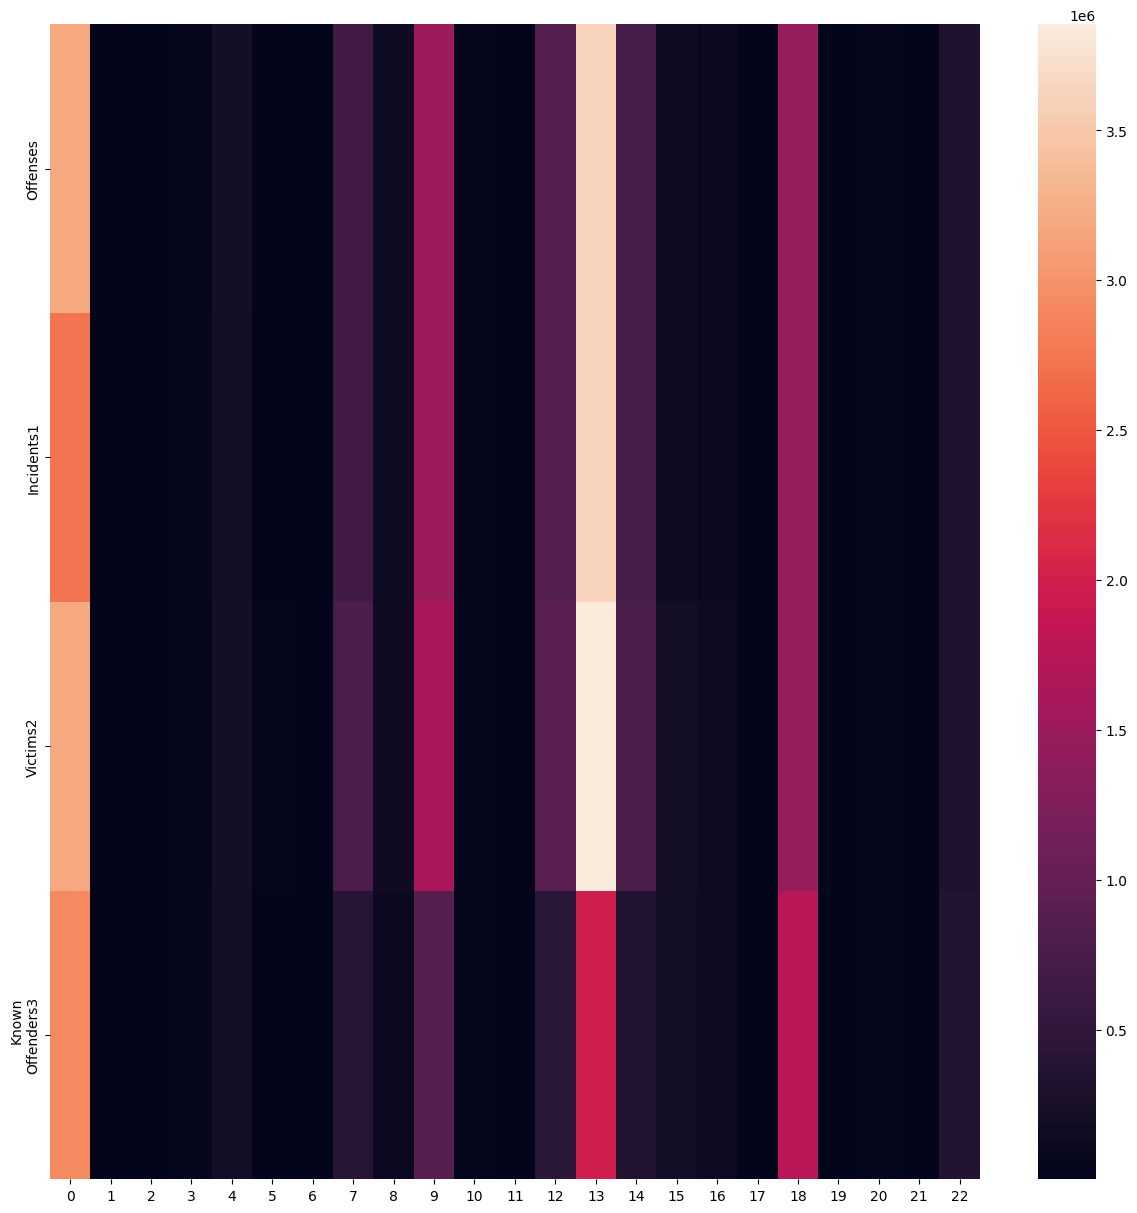

In [ ]:
import seaborn as sns
labels = ["Offenses","Incidents1","Victims2","Known\nOffenders3"]
dfheat =df["Offenses"],df["Incidents1"],df["Victims2"],df["Known\nOffenders3"]
heatmap = pd.DataFrame(dfheat,labels)
plt.figure(figsize=(15,15))
p1 = sns.heatmap(heatmap)